In [1]:
import pandas as pd
#graffica
import seaborn as sns
#datos
import numpy as np
#graficador
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('wine_dataset.csv',sep=',',quotechar='"',dtype={'Wine Type':'category'})

In [3]:
df.head(4)

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   

   OD280/OD315 of diluted wines  Proline Wine Type  
0                          3.92   1065.0       One  
1                          3.40   1050.0       One  
2                          3.17   1185.0       One  
3                          3.45   1480.0       One

In [4]:
x=df['Wine Type'].value_counts()

In [5]:
x

Two      71
One      59
Three    48
Name: Wine Type, dtype: int64

In [6]:
x=df['Wine Type'].value_counts().to_frame()

In [7]:
x

Wine Type
Two           71
One           59
Three         48

In [8]:
total_freq=x['Wine Type'].sum()

In [9]:
total_freq

178

In [10]:
#funcion para calcular la frecuencia relativa
def freq_relative(x):
    return x/total_freq

In [11]:
#para dibujar pasteles
def angulo(x):
    return freq_relative(x)*360

In [12]:
x

Wine Type
Two           71
One           59
Three         48

In [13]:
freq_relative(x['Wine Type'])

Two      0.398876
One      0.331461
Three    0.269663
Name: Wine Type, dtype: float64

In [14]:
#Asigna a x una nueva columna con ese nombre y el resultado que se va a guardar esta en x
x=x.assign(freq_relative=freq_relative(x['Wine Type']))

In [15]:
#crear nueva columna para los datos de cada fila para dibujar el pastel
x=x.assign(angulo=angulo(x['Wine Type']))

In [16]:
x

Wine Type  freq_relative      angulo
Two           71       0.398876  143.595506
One           59       0.331461  119.325843
Three         48       0.269663   97.078652

In [17]:
x.sum()

Wine Type        178.0
freq_relative      1.0
angulo           360.0
dtype: float64

In [18]:
x.describe()

Wine Type  freq_relative      angulo
count   3.000000       3.000000    3.000000
mean   59.333333       0.333333  120.000000
std    11.503623       0.064627   23.265754
min    48.000000       0.269663   97.078652
25%    53.500000       0.300562  108.202247
50%    59.000000       0.331461  119.325843
75%    65.000000       0.365169  131.460674
max    71.000000       0.398876  143.595506

# Realizar el plot lineal de la frecuencia encontrada

In [19]:
freq=freq_relative(x['Wine Type'])

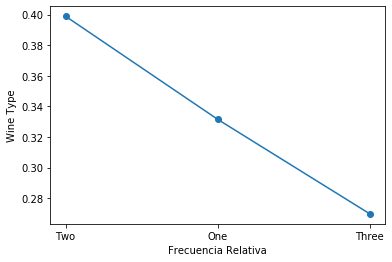

In [20]:

plt.xlabel("Frecuencia Relativa")
plt.ylabel("Wine Type")
plt.plot(freq_relative(x['Wine Type']), marker='o')
plt.show()

# Realizar el plot de caja con bigote del alcohol presente en los tres tipos de vino. Verificar si hay valores exatraños

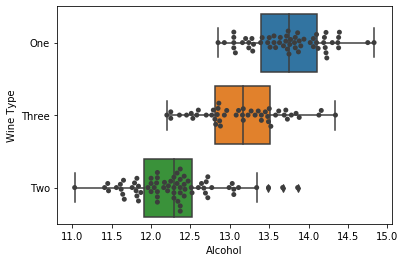

In [21]:
#plotar o graficar 
ax=sns.boxplot(x="Alcohol",y="Wine Type",data=df)
#para verificar como esta distribuida
ax=sns.swarmplot(x="Alcohol",y="Wine Type",data=df,color=".24")

# Median y desviación estándar de alcohol, alcalinida


In [22]:
#Obtener los valores de la columna Alcohol
media_Alc=df['Alcohol']

In [23]:
media_Alc.mean()

13.000617977528083

In [24]:
media_Alc.std()

0.8118265380058577

In [25]:
#Obtener los valores de la columna Alcalinity
media_Alcal=df['Alcalinity of ash']

In [26]:
media_Alcal.mean()

19.49494382022472

In [27]:
media_Alcal.std()

3.3395637671735052

# Encontrar la relación que existe entre el alcohol, intensidad de color de vino

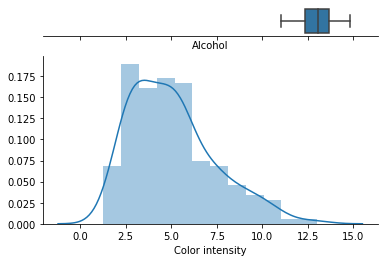

In [28]:
#2 variables para graficar 
f, (ax_box,ax_hist)= plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
#Alcohol
sns.boxplot(df['Alcohol'],ax=ax_box)
#grafico de la campana de gaus
sns.distplot(df['Color intensity'],ax=ax_hist)

#
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
#graficar la informacion en el mismo marco
sns.despine(ax=ax_box, left=True)